#### Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, 
  Portugal, October, 2011. EUROSIS.

4. Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

   The classification goal is to predict if the client will subscribe a term deposit (variable y).

5. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

6. Number of Attributes: 16 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2011].

#### Input variables:
**bank client data:**

   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
**related with the last contact of the current campaign:**
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)

**other attributes:**
  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None

# Importación de los datos
---


In [1]:
import pandas as pd
df_bank=pd.read_csv('bank-full.csv', sep=';')
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Análisis exploratorio
---


In [2]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [3]:
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [4]:
df_bank.shape

(45211, 17)

#### Variable objetivo

In [5]:
df_bank['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

Hay desbalanceo de datos, el 88,30% de los datos son ceros y sólo el 11,69% son unos.

# Balanceo de datos

# Transformación de las variables
---

In [6]:
lista_numericas=['age','balance','duration','day','pdays','previous','campaign']
lista_categoricas=['job','marital','education','contact','month','poutcome']
categoricas_binarias = ['default','housing','loan','y']

## Binarias

In [7]:
for i in categoricas_binarias:
    df_bank[i] = [0 if x == 'no' else 1 for x in df_bank[i]]

## Categóricas

Convierto las variables categóricas en dummies

In [8]:
## Transformamos las variables a dummies
for k in lista_categoricas:
    dummies = pd.get_dummies(df_bank[k],prefix=k)
    df_bank = pd.concat([df_bank, dummies], axis=1)

**Month**

In [9]:
df_bank.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                      (1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)

**Education**

In [10]:
df_bank.education.replace(('primary','secondary','tertiary','unknown'),
                      (1,2,3,4),inplace=True)

**Marital**

In [11]:
df_bank.marital.replace(('married','single','divorced'),
                      (1,2,3),inplace=True)

**Contact**

In [12]:
df_bank.contact.replace(('cellular','unknown','telephone'),
                      (1,2,3),inplace=True)

**Replace**

In [13]:
df_bank.poutcome.replace(('failure','unknown','other','success'),
                      (1,2,3,4),inplace=True)

**Job**

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_bank.job.unique())
le.classes_

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [15]:
df_bank.job = le.transform(df_bank.job)

## Numéricas

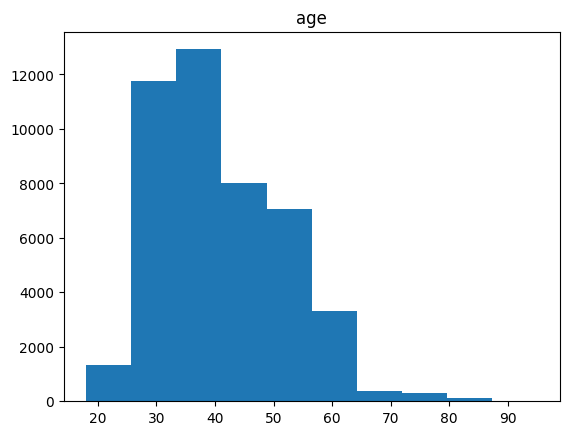

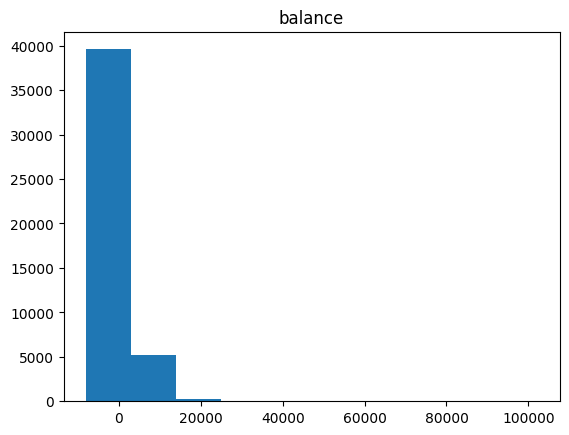

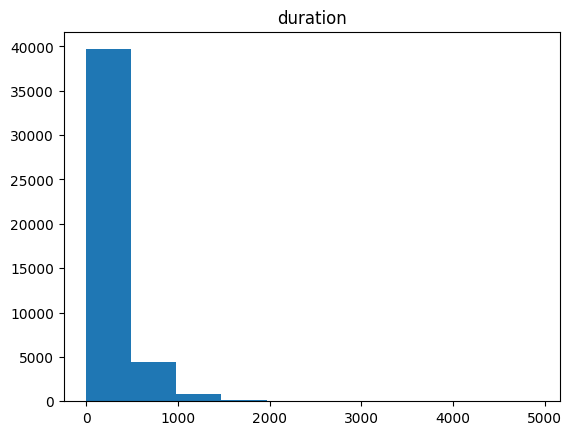

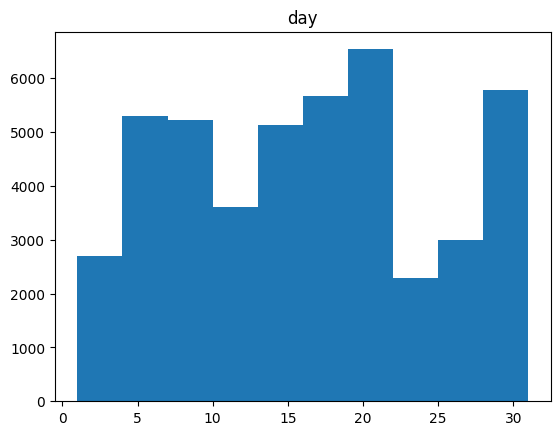

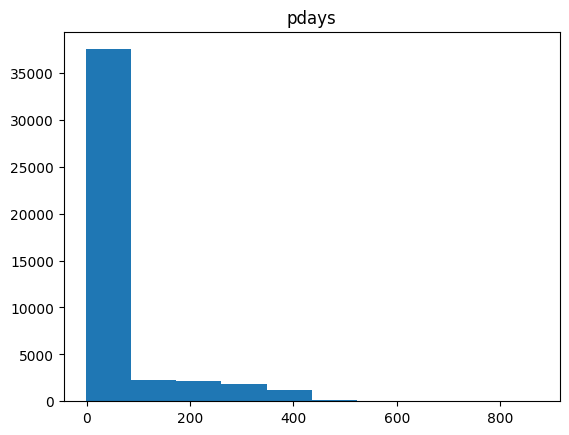

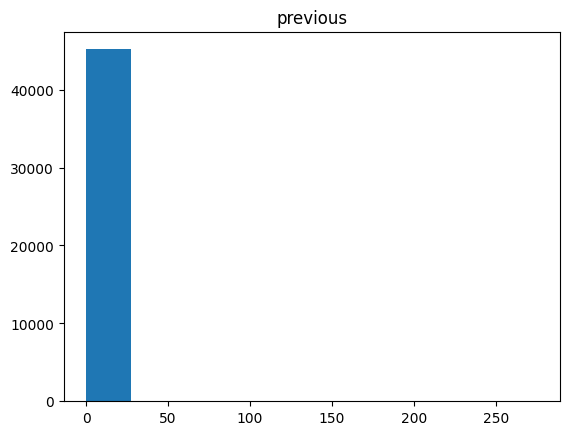

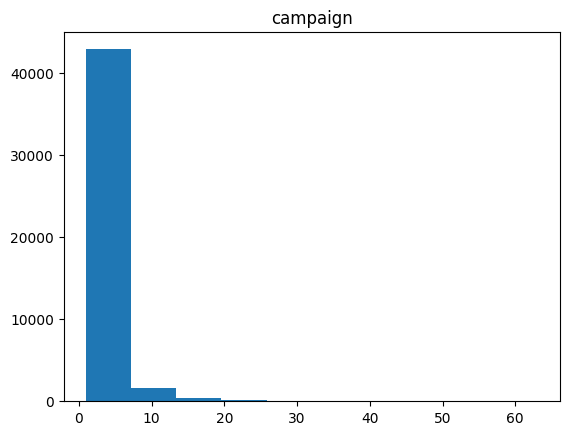

In [16]:
import matplotlib.pyplot as plt
for i in lista_numericas:
    plt.hist(df_bank[i])
    plt.title(i)
    plt.show()

In [17]:
import seaborn as sns
def proporciones_final (var,target,df):

    proporcion = pd.DataFrame()
    
    proporcion['%depositos'] = df[target].groupby(df[var]).mean()*100
    proporcion['Conteo'] = df[target].groupby(df[var]).count()
    proporcion= proporcion.round(3)   
    proporcion_filtered = proporcion[(proporcion['%depositos']>0) & (proporcion['Conteo']>10)]
        
    if len(proporcion_filtered)<100 and len(proporcion_filtered)>1:
        fig = plt.figure()
        ax = proporcion_filtered['Conteo'].plot(kind='bar',grid=True)
                
        ax2 = ax.twinx()
        ax2.plot(proporcion_filtered['%depositos'].values, linestyle='-', linewidth=2.0,color='g')
        plt.tight_layout()        
    else:        
        proporcion_filtered.reset_index(inplace=True)
        sns.lmplot(x = var,y ='%depositos',data=proporcion_filtered, fit_reg=True,ci=None) 

C:\Users\Kim\AppData\Local\Temp\ipykernel_14640\2747538931.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


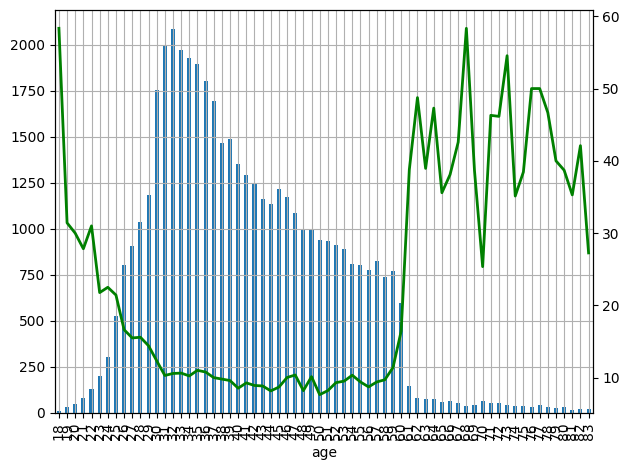

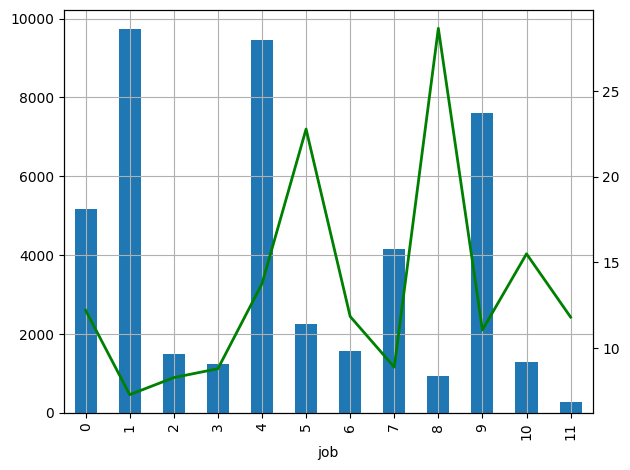

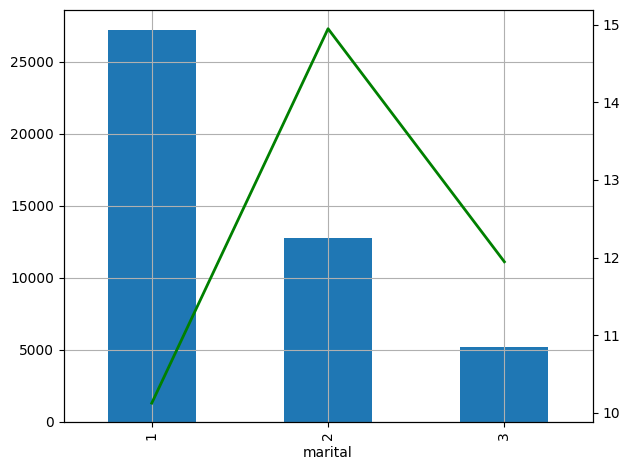

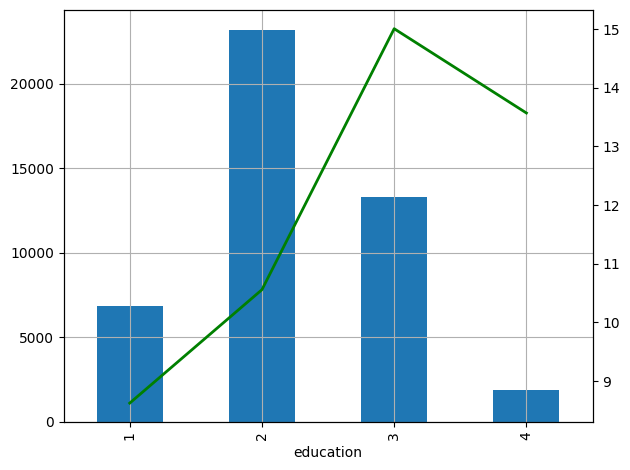

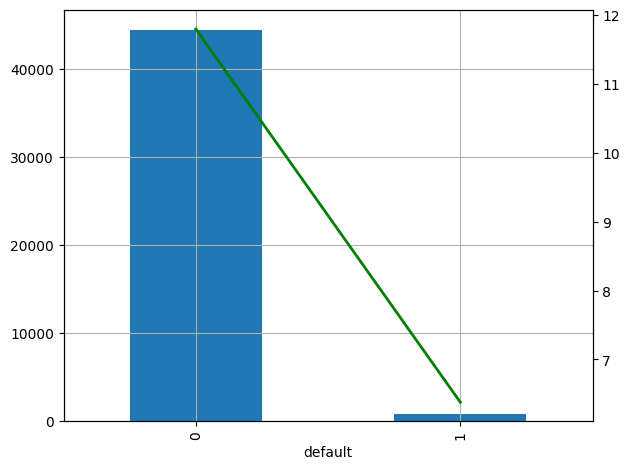

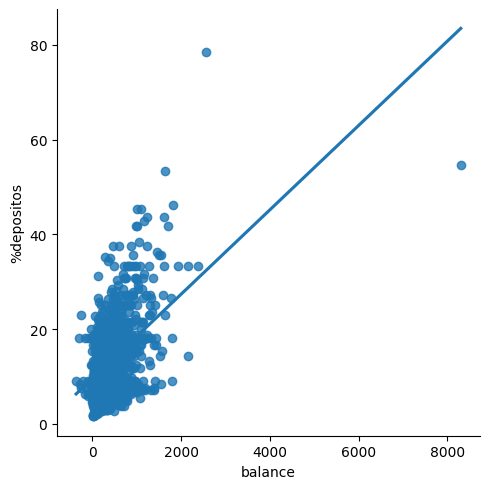

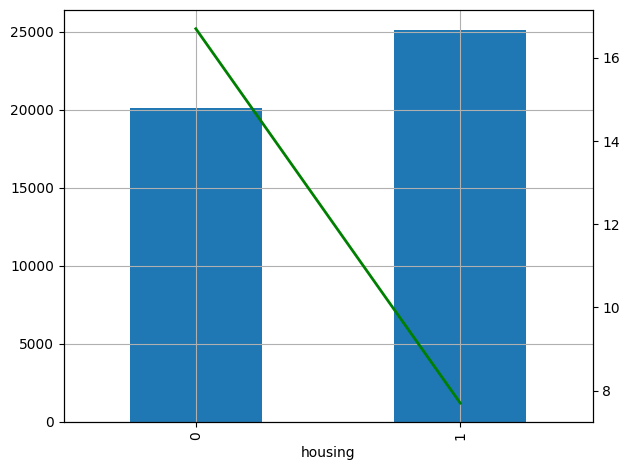

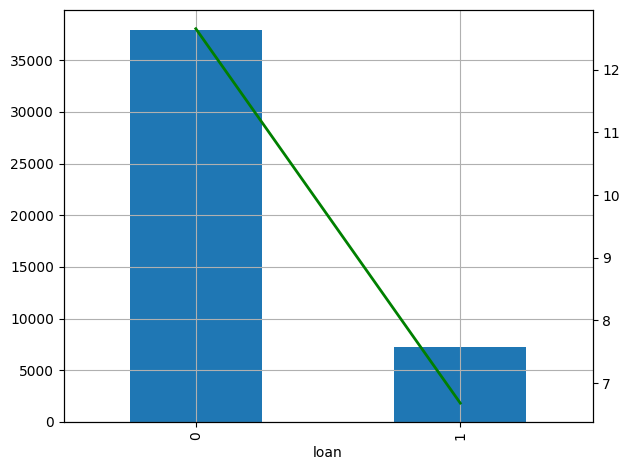

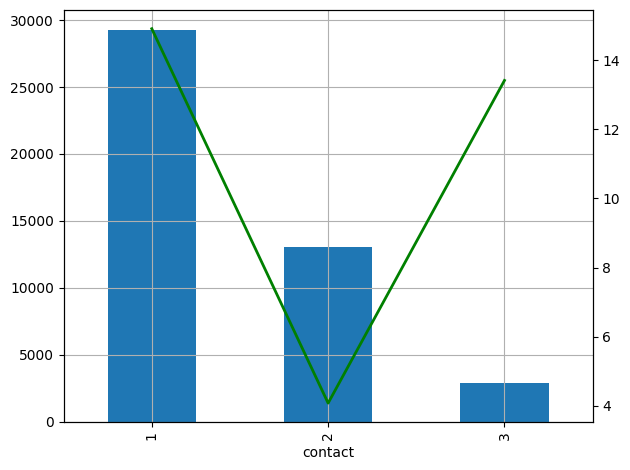

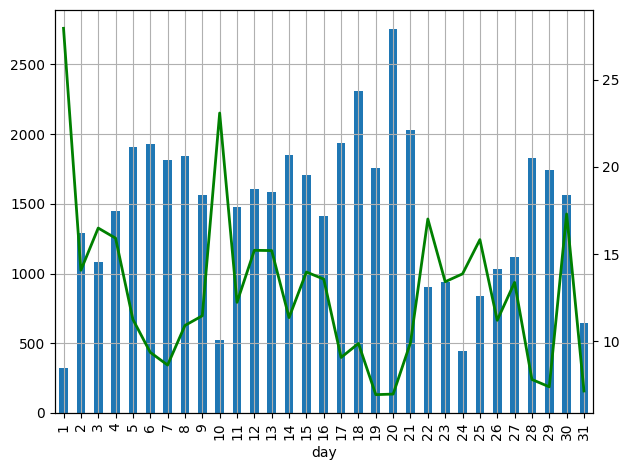

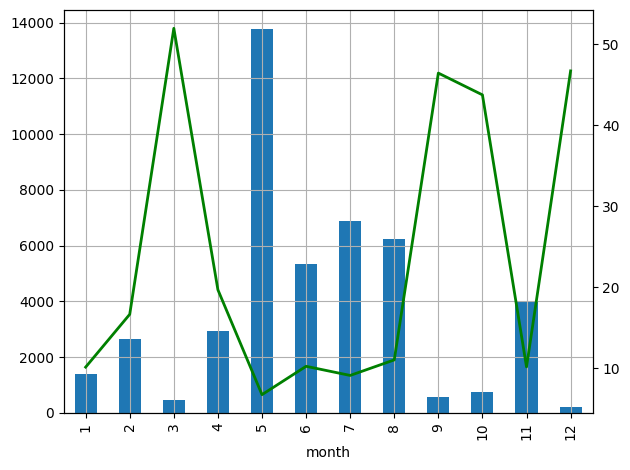

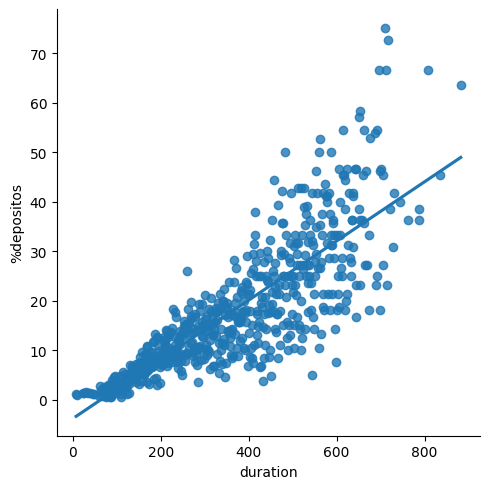

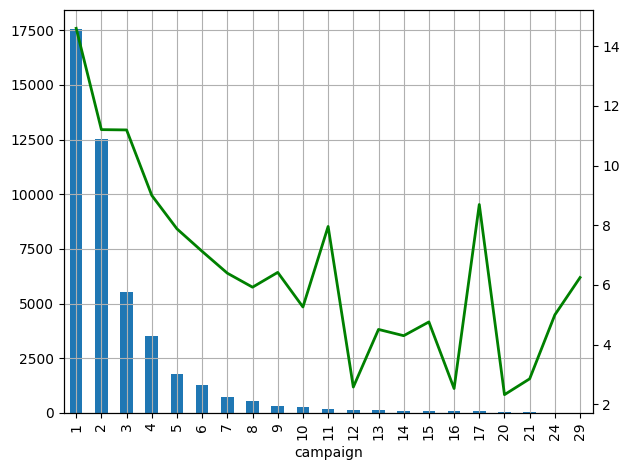

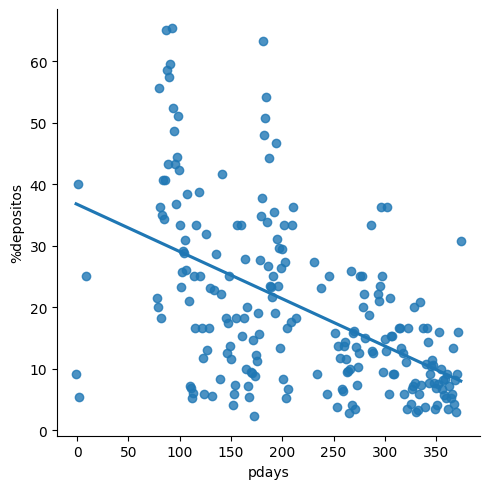

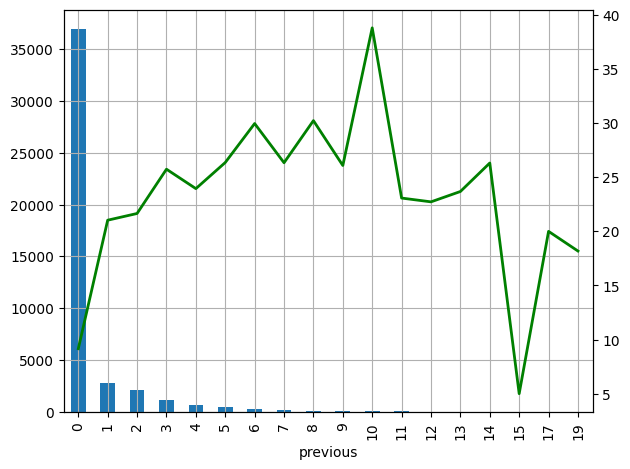

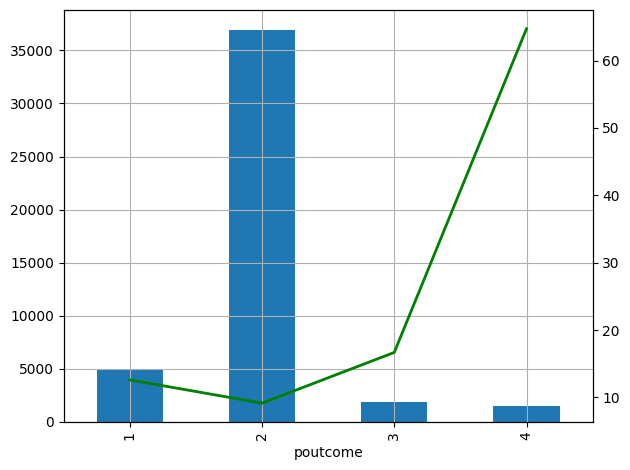

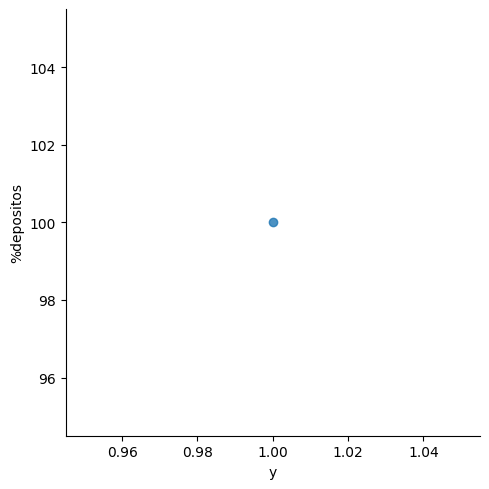

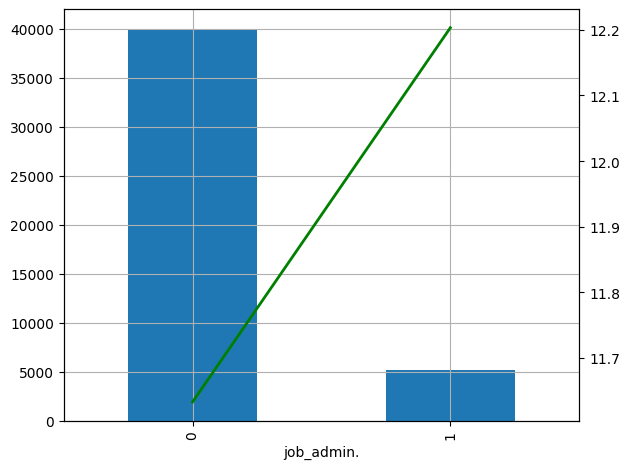

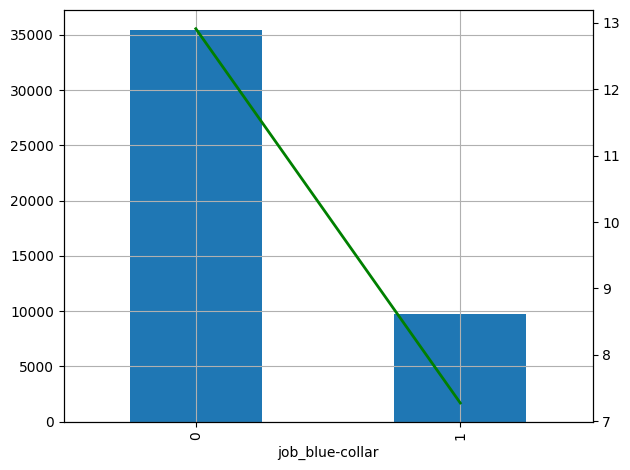

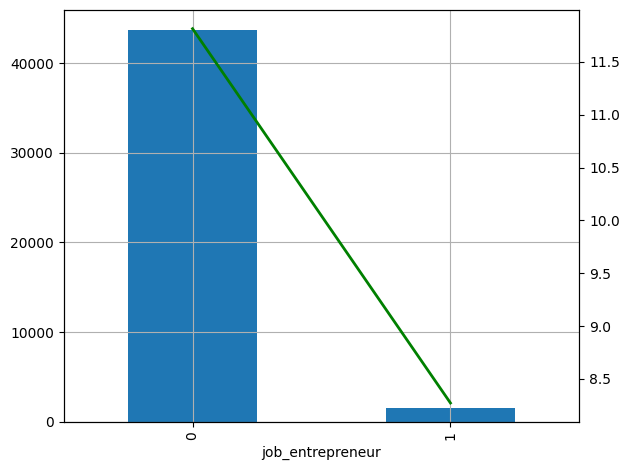

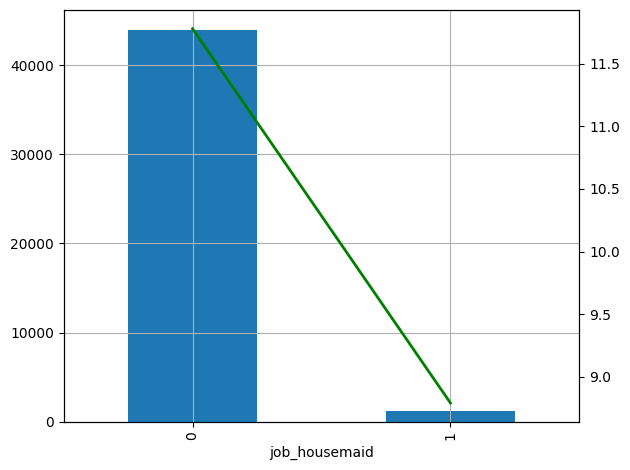

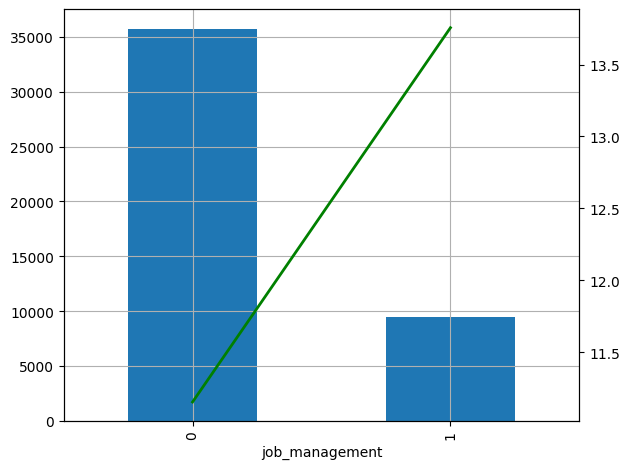

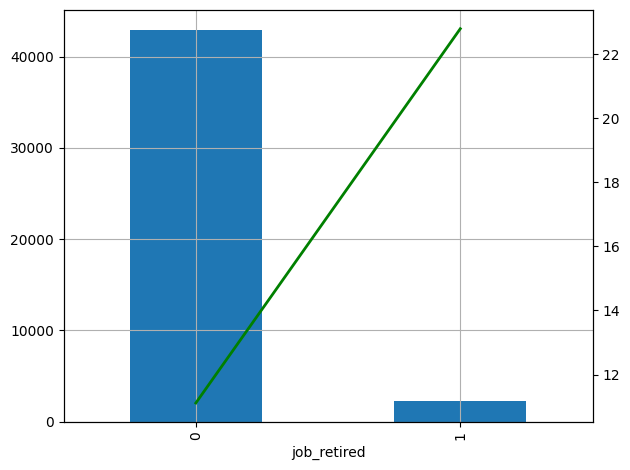

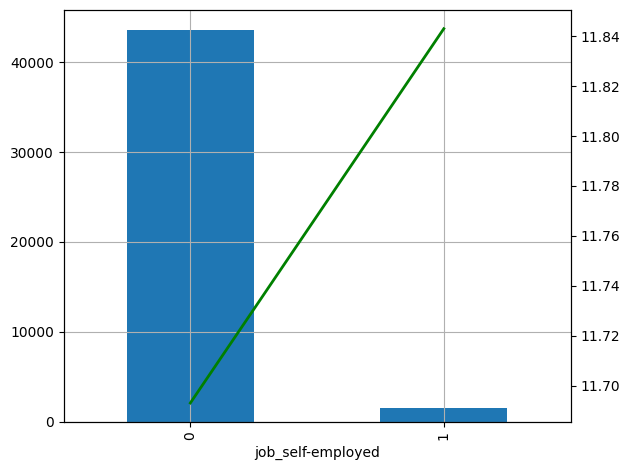

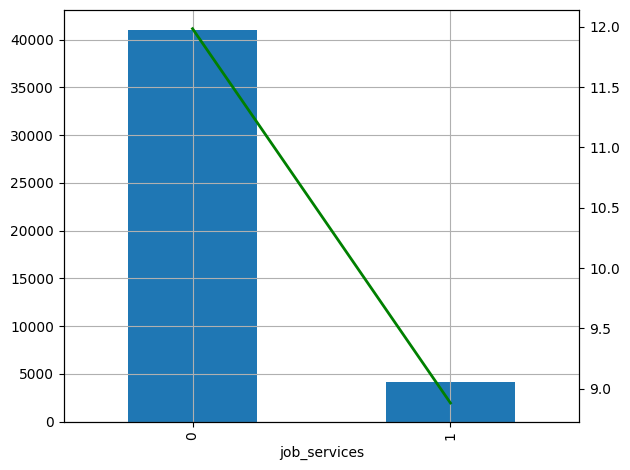

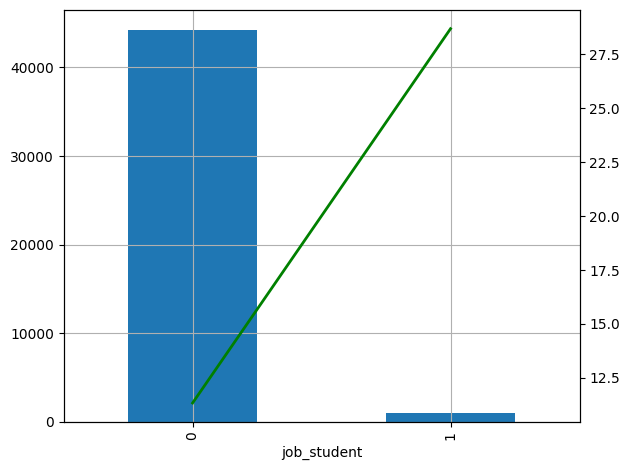

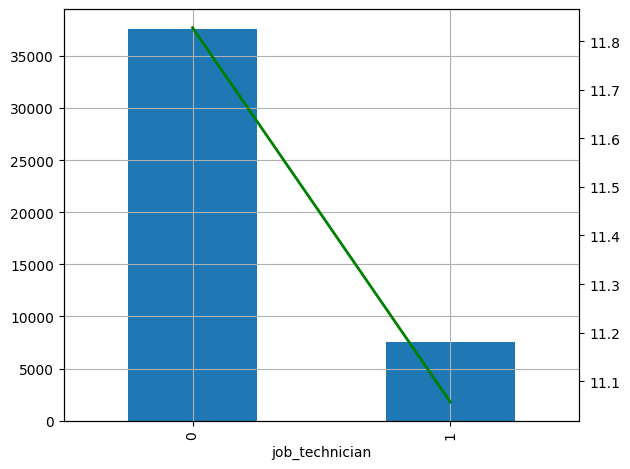

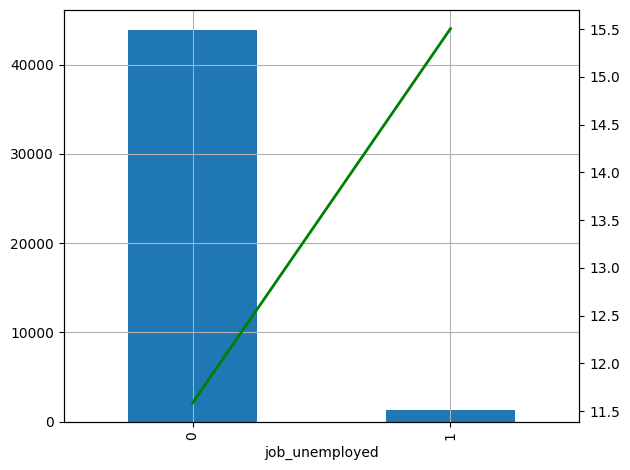

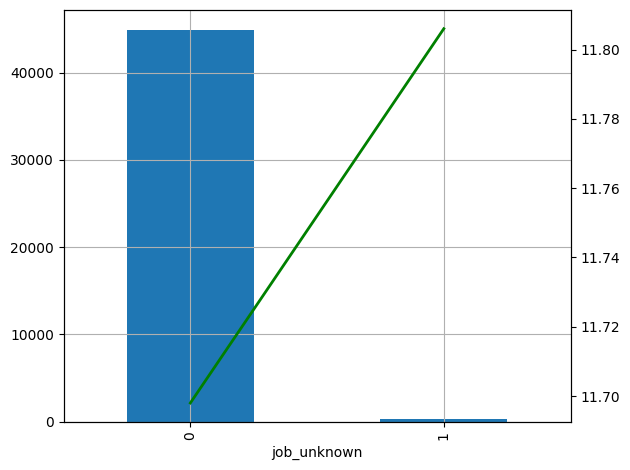

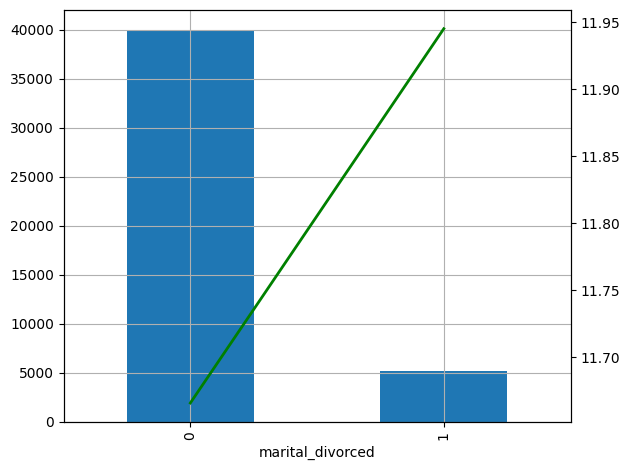

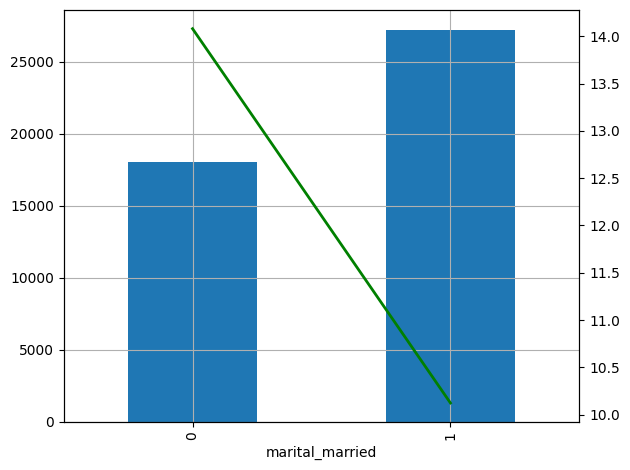

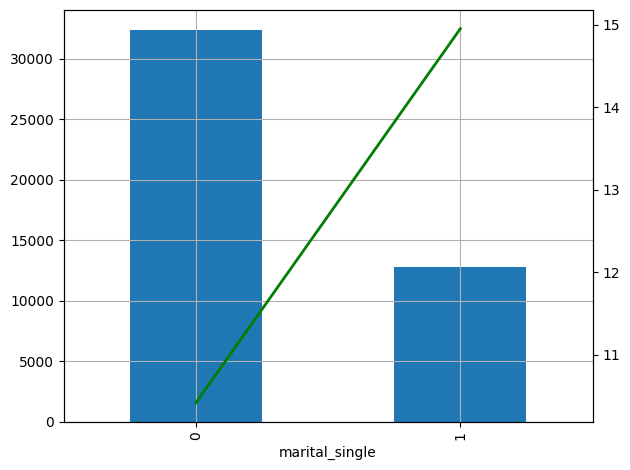

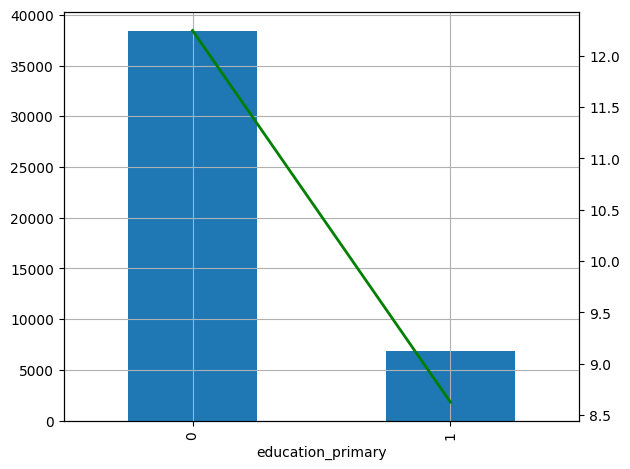

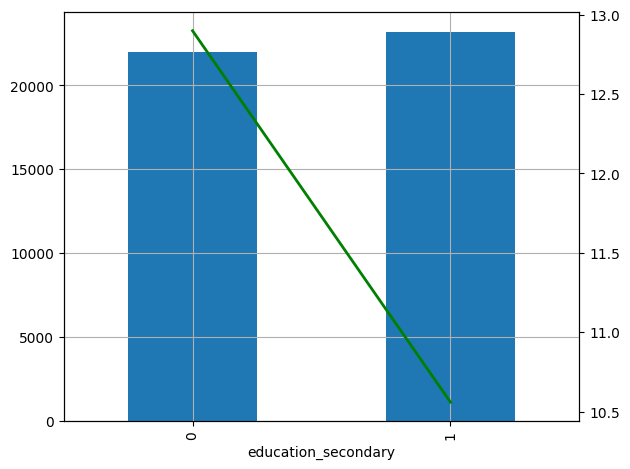

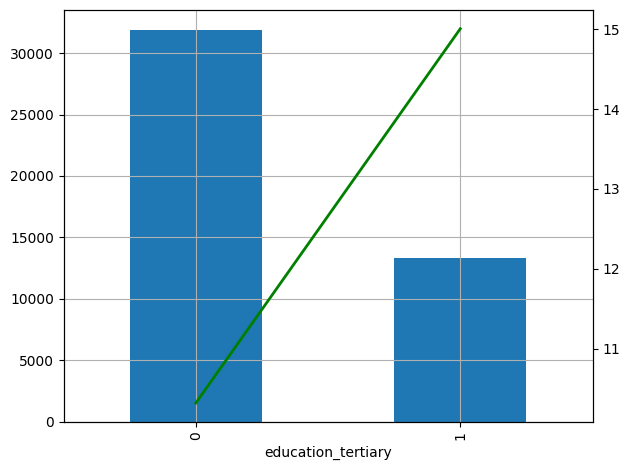

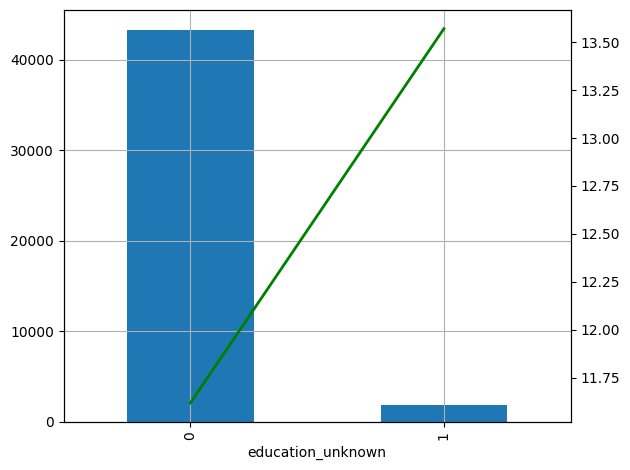

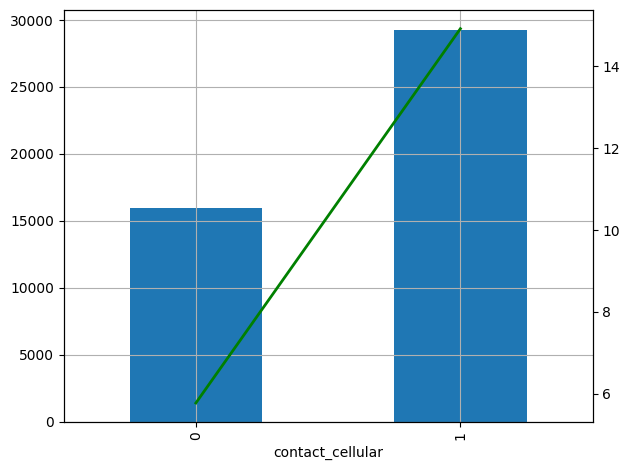

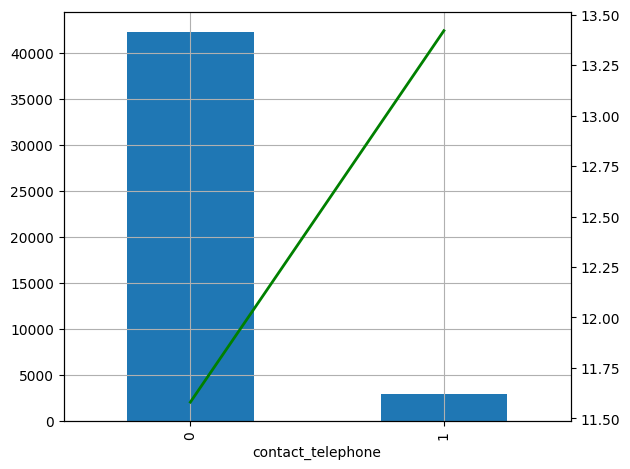

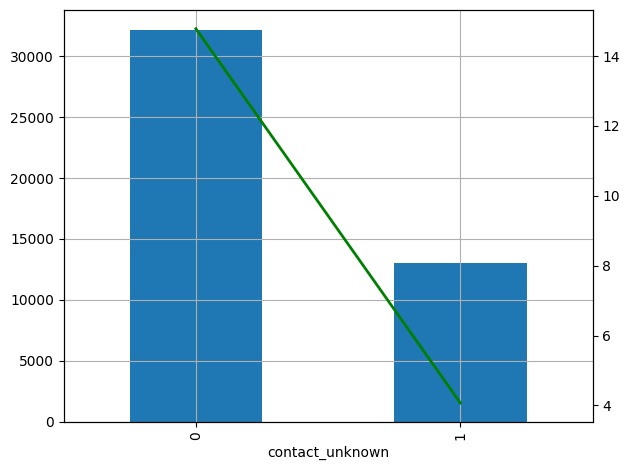

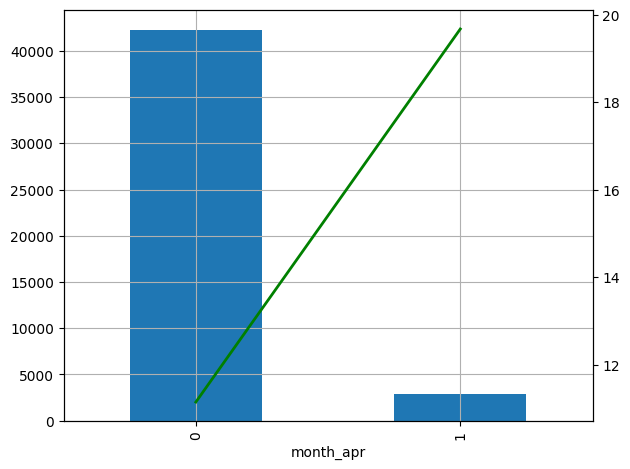

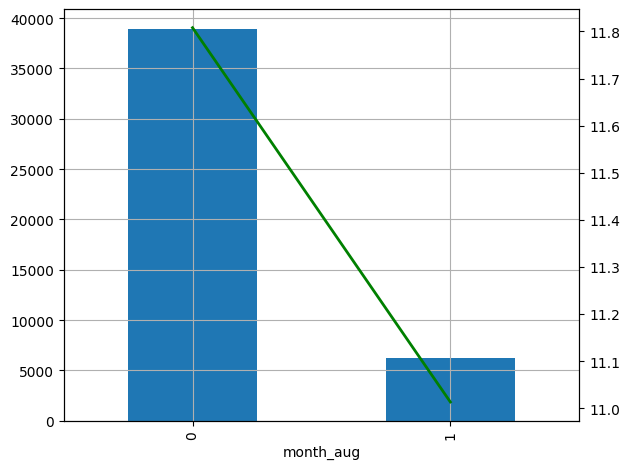

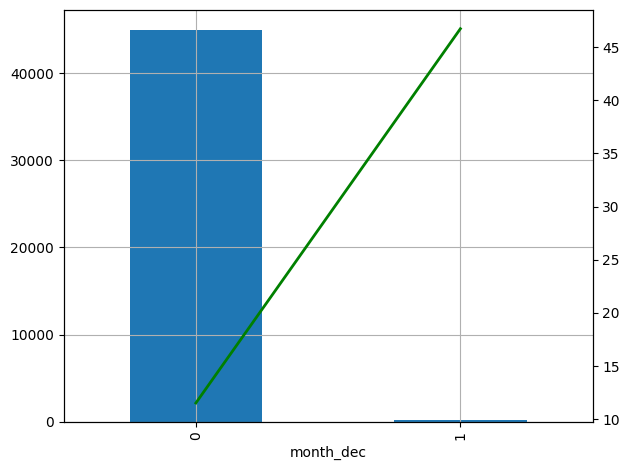

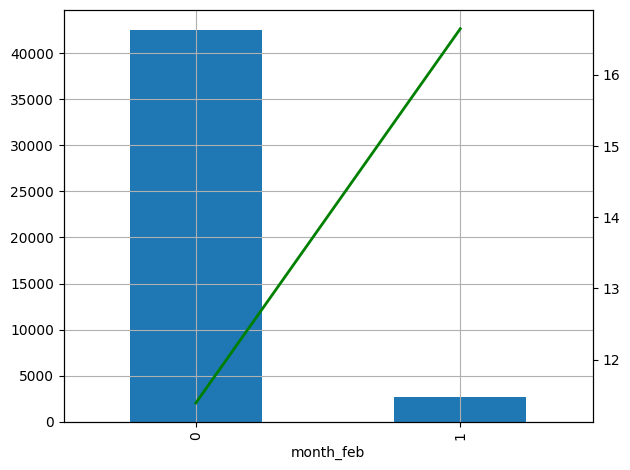

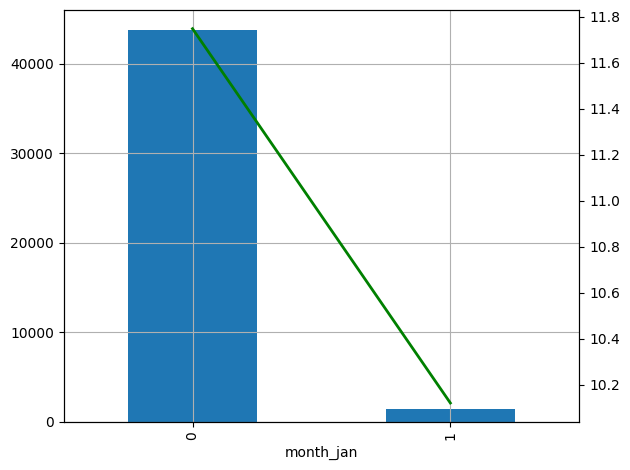

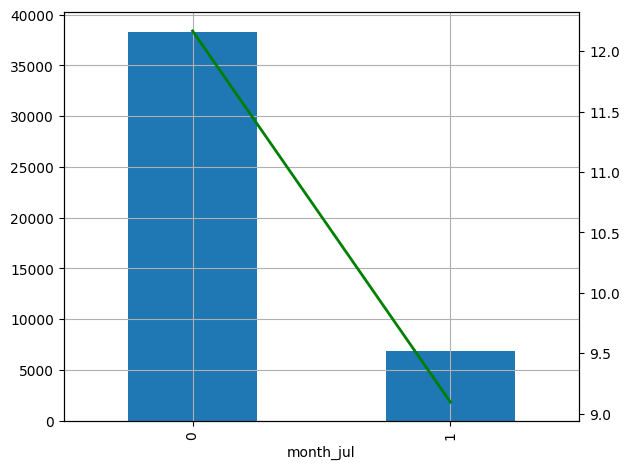

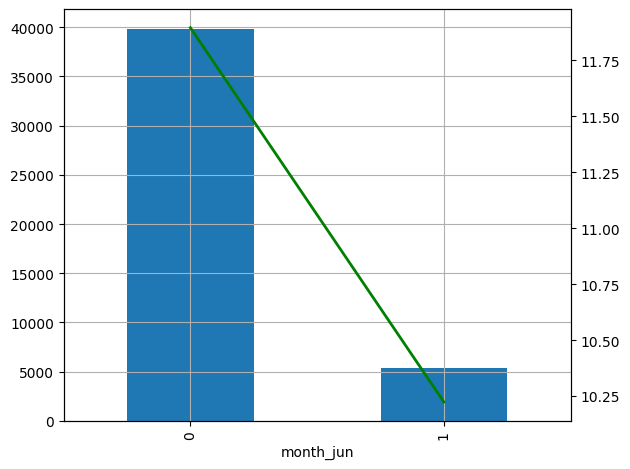

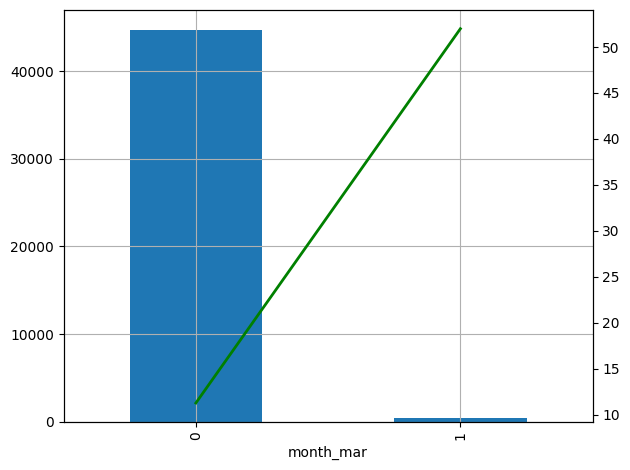

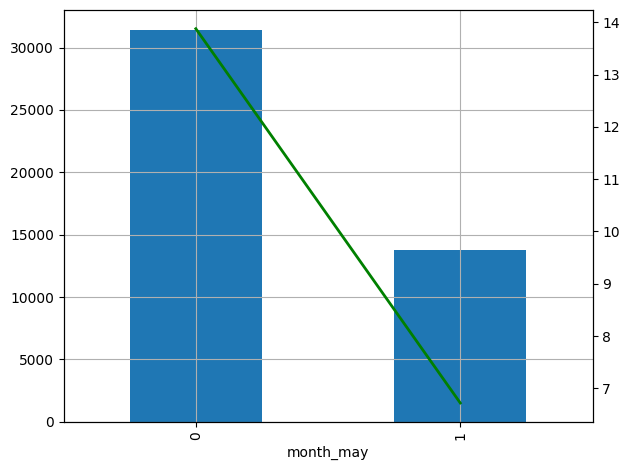

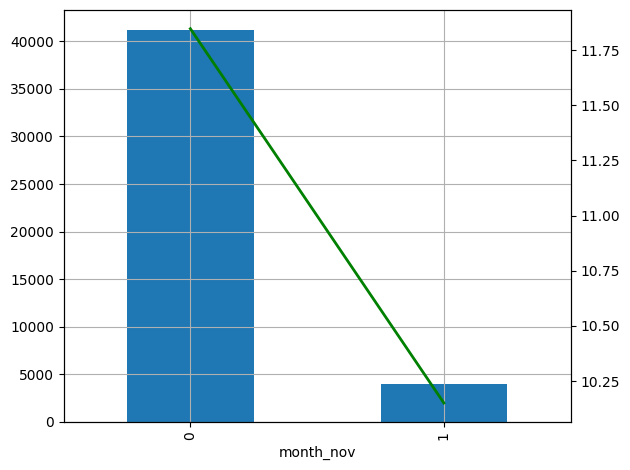

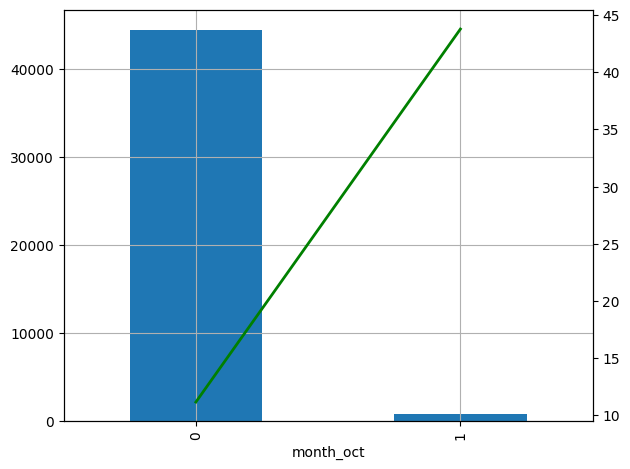

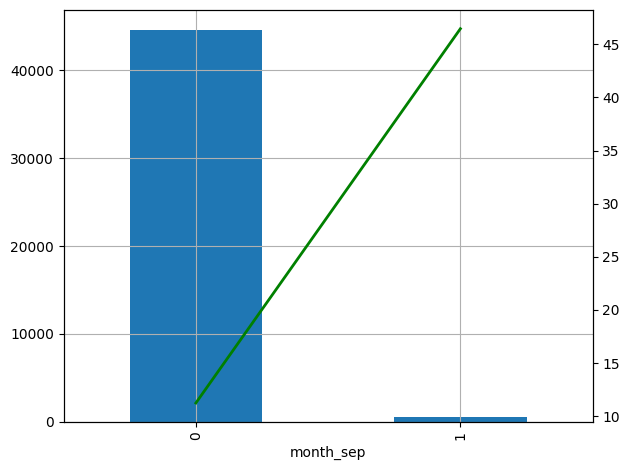

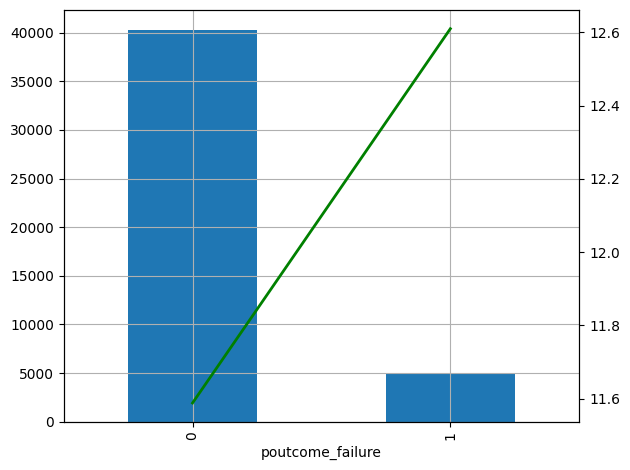

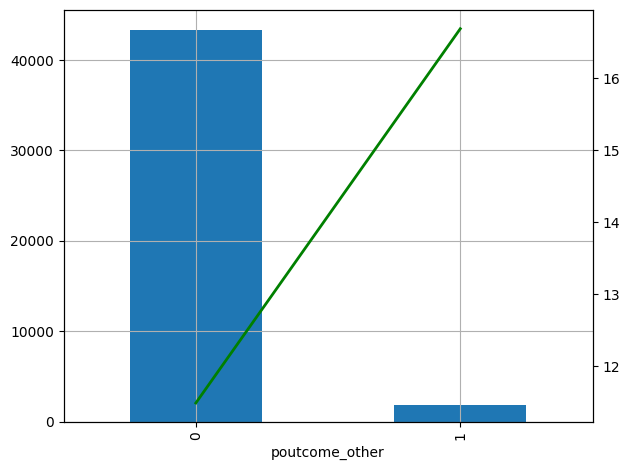

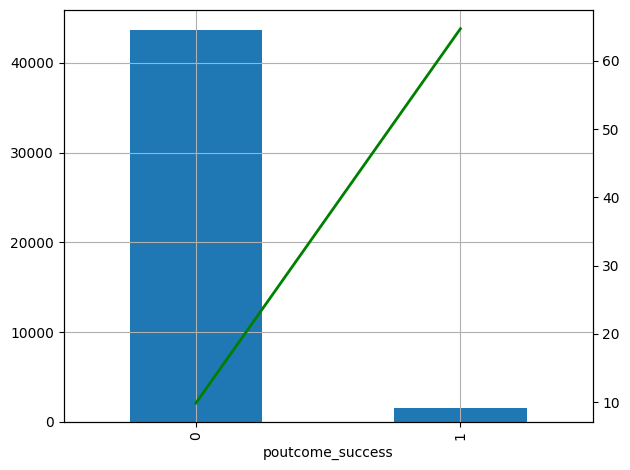

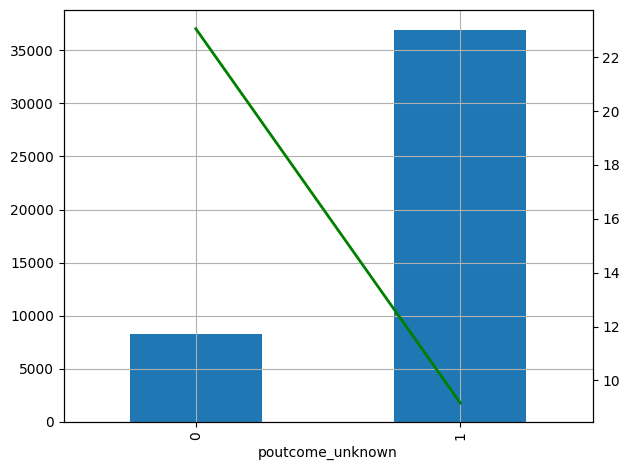

In [18]:
for i in df_bank.columns:
    proporciones_final (i, 'y', df_bank)

#### Feature Enginering

In [47]:
import numpy as np
def tramos(varib,varib_destino,tamanio,maximo,df):
    df[varib_destino]=np.where(df[varib]==0,-1,(df[varib]//tamanio)*tamanio)
    df[varib_destino]=np.where(df[varib_destino]>=maximo,maximo,df[varib_destino])

**Age**

In [21]:
#realizamos una variable con 3 rangos de edad y 3 variables con esos mismos rangos
df_bank['age_joven'] = df_bank['age'].apply(lambda x: 1 if x<=35 else 0)
df_bank['age_adulto'] = df_bank['age'].apply(lambda x: 1 if x>35 & x<60 else 0)
df_bank['age_jubilado'] = df_bank['age'].apply(lambda x: 1 if x>60 else 0)
df_bank['age_new'] = df_bank['age'].apply(lambda x: 0 if x<=35 else (1 if x>35 and x<60 else(2)))  

**Balance**

In [45]:
df_bank.balance.sort_values(ascending=True)

12909     -8019
15682     -6847
38736     -4057
7413      -3372
1896      -3313
          ...  
41693     71188
42558     81204
43393     81204
26227     98417
39989    102127
Name: balance, Length: 45211, dtype: int64

In [48]:
tramos('balance','balance_new',500,10000,df_bank)
df_bank['balance_new'] = df_bank['balance_new'].apply(lambda x: 0 if x<=0 else x)
df_bank['balance_negativo'] = df_bank['balance'].apply(lambda x: 1 if x<=0 else 0)
df_bank['balance_new2'] = df_bank['balance'].apply(lambda x: 0 if x<=100 else (1 if x>100 and x<=500 else(2 if x>500 and x<=2000 else(3 if x>2000 and x<10000 else(4)))))
df_bank['balance'] = df_bank['balance'].apply(lambda x: 0 if x<=0 else x)

**Campaign**

In [51]:
df_bank.campaign.sort_values(ascending=True)

0         1
27794     1
27793     1
27792     1
27791     1
         ..
5459     50
4299     51
5073     55
11914    58
4330     63
Name: campaign, Length: 45211, dtype: int64

In [52]:
## CAMPAIGN (observamos que la mitad de los datos están entre 1 y 2, creamos una nueva clase para el resto)
df_bank['campaign_new'] = df_bank['campaign'].apply(lambda x: 0 if x<=15 else 1)
df_bank['campaign_new2'] = df_bank['campaign'].apply(lambda x: 1 if x==1 else (2 if x==2 else(3))) 

**Pdays**

In [54]:
## PDAYS (casi todos los datos están en -1 (no contactado), por tanto, transformamos la variable en contactados y no contactados)
'''Semanas'''
df_bank['pdays_new5'] = df_bank['pdays'].apply(lambda x: 0 if x<=0 else (1 if x<7 else(2 if x>=7 and x<14 else(3))))
df_bank['pdays_new'] = df_bank['pdays'].apply(lambda x: 0 if x==-1 else x)
'''Meses'''
df_bank['pdays_new2'] = df_bank['pdays']//30
df_bank['pdays'] = df_bank['pdays'].apply(lambda x: 0 if x==-1 else x)
df_bank['pdays_new2'] = df_bank['pdays_new2'].apply(lambda x: 0 if x==-1 else x)
tramos('pdays_new2','pdays_new3',2,14,df_bank) 
df_bank['pdays_new3'] = df_bank['pdays_new3'].apply(lambda x: 0 if x<=0 else x)

**Previous**

In [56]:
## PREVIOUS (al igual que anteriormente, la mayoría no han sido contactados anteriormente, creamos una variable binaria)
df_bank['previous_new'] = df_bank['previous'].apply(lambda x: 0 if x == 0 else 1)
df_bank['previous_new_2'] = df_bank['previous'].apply(lambda x: 0 if x == 0 else 1)
tramos('previous','previous_new_2',2,10,df_bank) 
df_bank['previous_new_2'] = df_bank['previous_new_2'].apply(lambda x: 0 if x<=0 else x)

**Day**

In [57]:
## DAY (en este caso podemos crear una variable que calcule la quincena)
tramos('day','day_new',15,31,df_bank)

**Job**

In [58]:
## JOB (podemos hacer una variable de empleado y no empleado)
df_bank['job_new'] = df_bank['job'].apply(lambda x: 0 if x==11 or x ==6 or x==9  else 1)

**Duration**

In [59]:
tramos('duration','duration_new',5,5000,df_bank) 
df_bank['duration_new'] = df_bank['duration_new'].apply(lambda x: 0 if x<=0 else x)
df_bank['duration_new2'] = df_bank['duration_new']//60

# Correlación con la Target

In [60]:
corr = abs(df_bank.corr())
corr[['y']].sort_values(by = 'y',ascending = False,).style.background_gradient()

,y
y,1.000000
duration_new,0.394545
duration,0.394521
duration_new2,0.393241
poutcome_success,0.306788
poutcome,0.213476
pdays_new5,0.167930
previous_new,0.167263
poutcome_unknown,0.167051
age_jubilado,0.156184


# Balanceo de datos

In [73]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(df_bank.y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(df_bank.y==0)))

sm = SMOTE(random_state=2,sampling_strategy=0.3)
df_bank_res, y_bank_res = sm.fit_resample(df_bank.drop('y',axis=1), df_bank.y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(df_bank_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_bank_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_bank_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_bank_res==0)))

Before OverSampling, counts of label '1': 5289
Before OverSampling, counts of label '0': 39922 

After OverSampling, the shape of train_X: (51898, 73)
After OverSampling, the shape of train_y: (51898,) 

After OverSampling, counts of label '1': 11976
After OverSampling, counts of label '0': 39922


# Muestreo estratificado

In [80]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(df_bank_res,
                                                    y_bank_res,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = y_bank_res)

# Modelo

In [81]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train_res,y_train_res)
y_pred = model1.predict(X_test_res)

In [82]:
y_pred_proba = model1.predict_proba(X_test_res)

In [83]:
y_pred_proba

array([[0.97, 0.03],
       [0.64, 0.36],
       [0.82, 0.18],
       ...,
       [0.13, 0.87],
       [1.  , 0.  ],
       [0.99, 0.01]])

Estos son la probabilidad de cada cliente de suscribirse a un depósito a plazo

In [85]:
pd.DataFrame(y_pred_proba, columns=['cero', 'uno'])['uno'].sort_values(ascending=False)

8425    1.0
8630    1.0
5159    1.0
4438    1.0
1260    1.0
       ... 
4448    0.0
8141    0.0
2466    0.0
2461    0.0
5444    0.0
Name: uno, Length: 10380, dtype: float64

#### Métricas del modelo

In [79]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
def saca_metricas(y1, y2):
    print('matriz de confusión')
    print(confusion_matrix(y1, y2))
    print('accuracy')
    print(accuracy_score(y1, y2))
    print('precision')
    print(precision_score(y1, y2))
    print('recall')
    print(recall_score(y1, y2))
    print('f1')
    print(f1_score(y1, y2))
    false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC')
    print(roc_auc)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)  

matriz de confusión
[[7681  304]
 [ 514 1881]]
accuracy
0.9211946050096339
precision
0.8608695652173913
recall
0.7853862212943633
f1
0.8213973799126638
AUC
0.8736574187248272


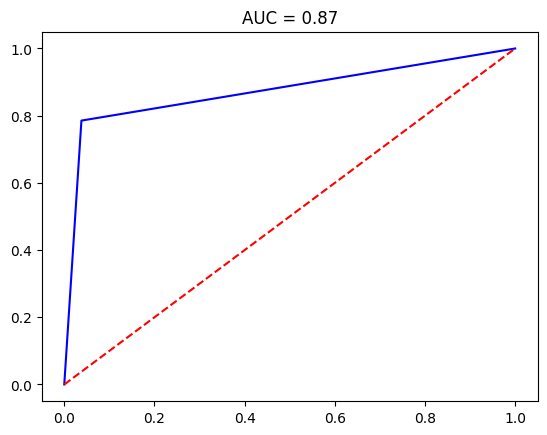

In [86]:
saca_metricas(y_test_res, y_pred)

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test_res, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7985
           1       0.86      0.79      0.82      2395

    accuracy                           0.92     10380
   macro avg       0.90      0.87      0.89     10380
weighted avg       0.92      0.92      0.92     10380



#### Importancia de las variables 

<AxesSubplot: >

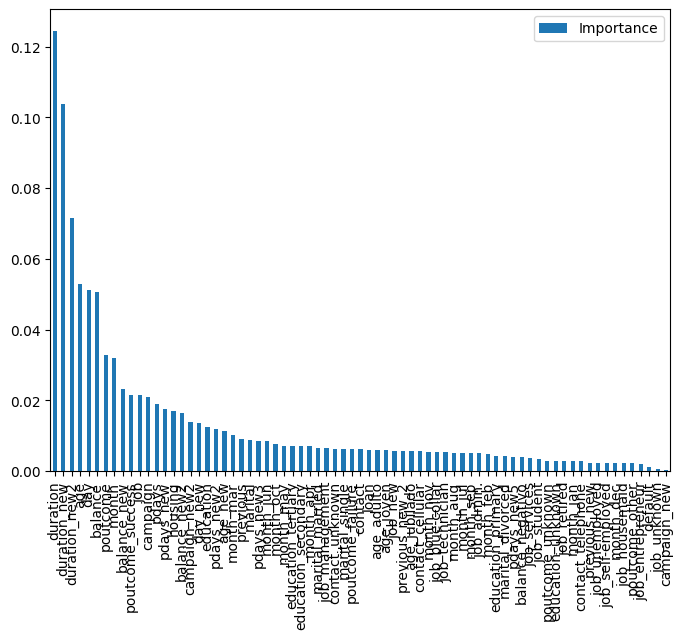

In [70]:
feat_importances = pd.DataFrame(model1.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

# Validación cruzada individual

In [91]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(estimator=model1, X=X_train_res, y=y_train_res, cv=5)

In [92]:
results

array([0.92148362, 0.91979769, 0.91630539, 0.91677707, 0.92291943])

In [94]:
print(results.mean())

0.9194566400889992


In [95]:
print(results.std())

0.002581716920637576


# Guardar el modelo ya entrenado como un objeto 

In [ ]:
import pickle

#Creamos el fichero
pkl_filename = "modelo1.pkl"

#'wb' ➡️ Con permisos de escritura
with open(pkl_filename, 'wb') as file:

    pickle.dump(model4, file)


In [ ]:
!jt -l monokai